In [1]:

import firebase_admin
from firebase_admin import credentials, firestore

cred = credentials.Certificate("cred.json")
firebase_admin.initialize_app(cred);

In [2]:
db = firestore.client()

In [3]:
# comment firestore calls to see it work locally
surveyDetails = {
    u'title': u'Intro Survey',
    u'description': u'Tell us a bit about yourself',
}

surveyQuestions = [
    {
    u'question': u'What is your gender?',
    u'options': [u'Male', u'Female']
    },
    {
    u'question': u'How old are you?',
    u'options': [u'< 18', u'> 18 and < 40', u'> 40 and < 60',u'> 60']
    },
    {
    u'question': u'How often do you travel?',
    u'options': [u'Daily', u'Weekly', u'Monthly',u'Yearly']
    },
    {
    u'question': u'Have you been to a Cube Stop before?',
    u'options': [u'Yes',u'No']
    },
    {
    u'question': u'How do you travel?',
    u'options': [u'Personal Car',u'Bus or Taxi']
    },
]

ref = db.collection(u'surveys').add(surveyDetails)
for q in surveyQuestions:
    ref[1].collection(u'questions').add(q)
surveyId = ref[1].id 

In [7]:
# creating mock data to visualize
import random

def generateMockResponses():
    response = []
    for q in surveyQuestions:
        response.append(random.choice(range(len(q['options']))))
    return response

user_count = 10
user_ids = []
user_response = []
for i in range(user_count):
    ref = db.collection(u'users').add({})
    user_ids.append(ref[1].id)
    res = generateMockResponses()
    user_response.append(res)
    d = {
        u'surveyId': surveyId,
        u'response': res
    }
    ref[1].collection('surveyResponse').add(d)

In [9]:
# Now this data can be pulled from firestore but I am using what I have locally
import matplotlib.pyplot as plt
def analyseData():
    response = []
    for i, q in enumerate(surveyQuestions):
        res = {}
        for j in range(len(q['options'])):
            count = 0
            for u in user_response:
                if(u[i]==j):
                    count +=1
            res[q['options'][j]] = count
        response.append(res)
    return response

In [12]:
data = analyseData()
data

[{'Male': 7, 'Female': 3},
 {'< 18': 5, '> 18 and < 40': 4, '> 40 and < 60': 0, '> 60': 1},
 {'Daily': 3, 'Weekly': 3, 'Monthly': 4, 'Yearly': 0},
 {'Yes': 6, 'No': 4},
 {'Personal Car': 6, 'Bus or Taxi': 4}]

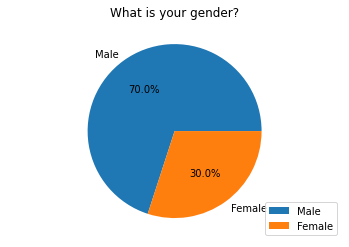

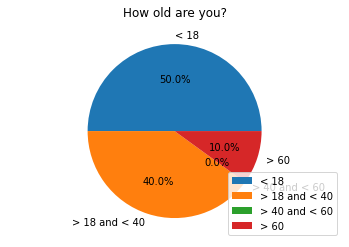

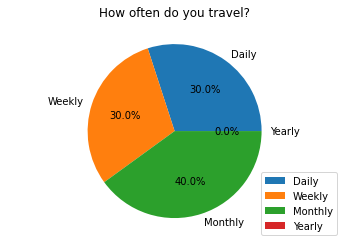

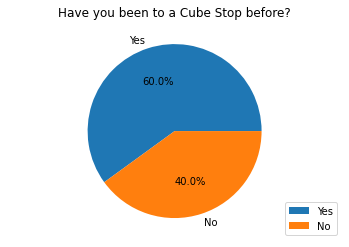

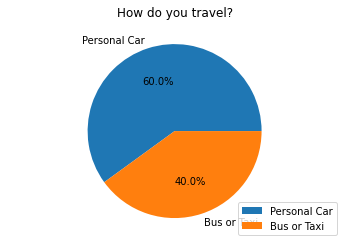

In [16]:
# making pie charts
for i, d in enumerate(data):
    labels = d.keys()
    val = d.values()
    plt.axis("equal")
    plt.pie(val, labels=labels, autopct='%1.1f%%')
    plt.legend(loc='lower right')
    plt.title(surveyQuestions[i]['question'])
    plt.show()

In [29]:
userId = u"Aa6ZL8elAVh3eVSHBN5u5AVxzpI3"
ddocs = db.collection(u'users').document(userId).collection(u"surveyResponse").where(u'surveyId', u'==', surveyId).stream()
responseDoc = None
for dd in ddocs:
    response = dd.to_dict()["response"]

for k,v in response.items():
    print(surveyQuestions[int(k)]['question'])
    print(surveyQuestions[int(k)]['options'][v-1])

docs = db.collection(u'users').document(userId).collection(u"feedbacks").stream()
for i, doc in enumerate(docs):
    d = doc.to_dict()
    print(f"Feedback {i+1}:")
    print(d["feedback"])
    print()

What is your gender?
Male
How old are you?
> 60
Have you been to a Cube Stop before?
Yes
How often do you travel?
Yearly
How do you travel?
Bus or Taxi
Feedback 1:
Couldn't find a place to park my car

Feedback 2:
Great place to rest. Will visit again.

Feedback 3:
Good food.

